Загрузка библиотек и данных

In [1]:
%%capture
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd

%matplotlib inline

!wget https://www.dropbox.com/s/03ny8axhz0zsdlq/predict_house_price_training_data.xlsx
!wget https://www.dropbox.com/s/fkrpt3tbtc5eb1x/predict_house_price_test_data.xlsx

training_data = pd.read_excel('predict_house_price_training_data.xlsx')
training_data.info()

Выбор прогнозируемого параметра

In [2]:
target_variable_name = 'Год постройки'
training_target_variable = training_data[target_variable_name]
training_target_variable

0        1996
1        1955
2        1961
3        1963
4        1925
         ... 
15124    2007
15125    1914
15126    2007
15127    1981
15128    1961
Name: Год постройки, Length: 15129, dtype: int64

Отображение остальных параметров

In [3]:
training_samples = training_data.drop(target_variable_name, axis=1)
training_samples.head()

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год реновации,Широта,Долгота
0,830000,5,3.50,3490,21780,2.0,0,0,3,8,3490,0,0,47.6707,-122.144
1,385000,4,1.75,2360,7620,1.0,0,0,4,7,1180,1180,0,47.5278,-122.345
2,610000,6,2.75,2040,8560,1.0,0,2,4,7,1100,940,0,47.6160,-122.115
3,550000,3,1.75,1940,8376,1.0,0,0,4,8,1290,650,0,47.5586,-122.173
4,1300000,3,2.75,3450,5350,1.5,0,3,4,9,2590,860,0,47.6389,-122.407


Отображение значений переменных в тестовой выборке

In [4]:
test_data = pd.read_excel('predict_house_price_test_data.xlsx')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Целевая.Цена         6484 non-null   int64  
 1   Спальни              6484 non-null   int64  
 2   Ванные               6484 non-null   float64
 3   Жилая площадь        6484 non-null   int64  
 4   Общая площадь        6484 non-null   int64  
 5   Количество этажей    6484 non-null   float64
 6   Вид на воду          6484 non-null   int64  
 7   Просмотрены ранее    6484 non-null   int64  
 8   Состояние            6484 non-null   int64  
 9   Оценка риелтора      6484 non-null   int64  
 10  Площадь без подвала  6484 non-null   int64  
 11  Площадь подвала      6484 non-null   int64  
 12  Год постройки        6484 non-null   int64  
 13  Год реновации        6484 non-null   int64  
 14  Широта               6484 non-null   float64
 15  Долгота              6484 non-null   f

In [5]:
test_target_variable = test_data[target_variable_name]
test_samples = test_data.drop(target_variable_name, axis=1)
test_samples.head()

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год реновации,Широта,Долгота
0,260000,3,1.00,1300,10139,1.0,0,0,3,7,1300,0,2007,47.3427,-122.087
1,734500,4,2.75,3280,6845,2.0,0,0,3,10,3280,0,0,47.7042,-122.107
2,325000,1,1.00,1220,12426,1.0,0,4,4,6,1220,0,0,47.4047,-122.331
3,1990000,3,2.50,2880,13500,1.0,0,4,5,8,1520,1360,0,47.6281,-122.216
4,315000,3,2.00,1300,3731,1.0,0,0,3,7,900,400,0,47.5374,-122.270


In [6]:
from sklearn import linear_model, ensemble
linear_regression_model = linear_model.LinearRegression()
random_forest_model = ensemble.RandomForestRegressor()

linear_regression_model.fit(training_samples, training_target_variable)
random_forest_model.fit(training_samples, training_target_variable)

test_predictions_linear = linear_regression_model.predict(test_samples)
test_predictions_random_forest = random_forest_model.predict(test_samples)

Вычисление мер прогнозирования

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mean_absolute_error_linear_model = mean_absolute_error(test_target_variable, test_predictions_linear) 
mean_squared_error_linear_model = mean_squared_error(test_target_variable, test_predictions_linear)

mean_absolute_error_random_forest_model = mean_absolute_error(test_target_variable, test_predictions_random_forest)
mean_squared_error_random_forest_model = mean_squared_error(test_target_variable, test_predictions_random_forest)

Графики и значения мер ошибок

In [8]:
import matplotlib.pyplot as plt

min_value = test_data[target_variable_name].min()
max_value = test_data[target_variable_name].max()

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели линейной регрессии".format(
        mean_absolute_error_linear_model, 
        np.sqrt(mean_squared_error_linear_model)))

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели случайного леса".format(
       mean_absolute_error_random_forest_model, 
       mean_squared_error_random_forest_model**(1/2)))

MAE:   14.16, RMSE:   18.78 для модели линейной регрессии
MAE:    7.78, RMSE:   12.20 для модели случайного леса


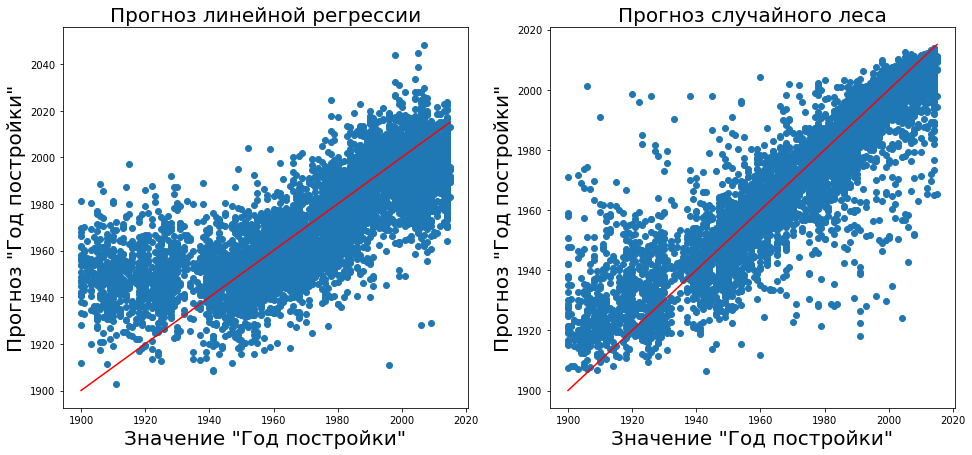

In [9]:
fig, axs = plt.subplots(1, 2)
fig.set_figheight(7)
fig.set_figwidth(16)
axs[0].set_title('Прогноз линейной регрессии', fontsize=20)
axs[0].set_xlabel(f'Значение "{target_variable_name}"', fontsize=20)
axs[0].set_ylabel(f'Прогноз "{target_variable_name}"', fontsize=20)
axs[0].scatter(test_target_variable, test_predictions_linear)
axs[0].plot([min_value, max_value], [min_value, max_value], 'r')

axs[1].set_title('Прогноз случайного леса', fontsize=20)
axs[1].set_xlabel(f'Значение "{target_variable_name}"', fontsize=20)
axs[1].set_ylabel(f'Прогноз "{target_variable_name}"', fontsize=20)
axs[1].scatter(test_target_variable, test_predictions_random_forest)
axs[1].plot([min_value, max_value], [min_value, max_value], 'r')

plt.show()

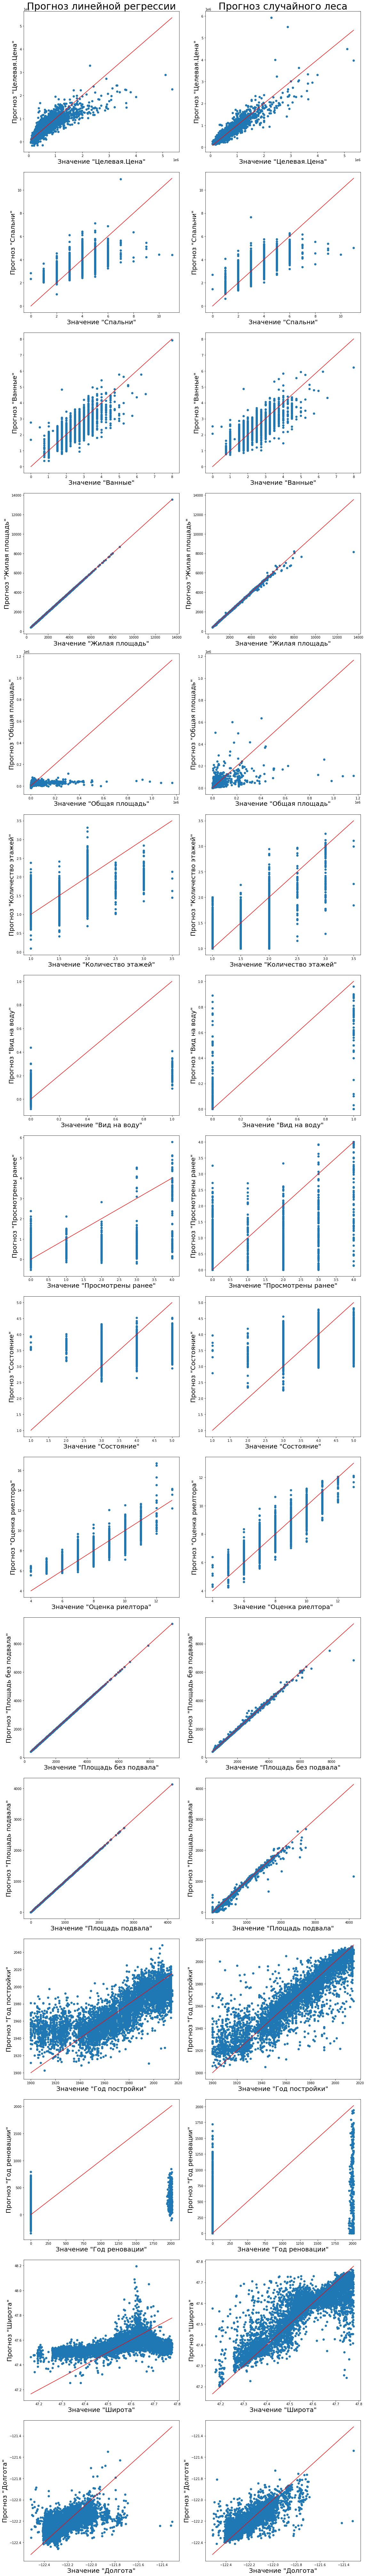

In [10]:
#@title Все графики (даже бессмысленные)
fig, axs = plt.subplots(len(training_data.columns), 2)
fig.set_figheight(7*len(training_data.columns))
fig.set_figwidth(16)
axs[0, 0].set_title('Прогноз линейной регрессии', fontsize=30)
axs[0, 1].set_title('Прогноз случайного леса', fontsize=30)

num = 0
for target_variable_name in training_data:

  training_target_variable = training_data[target_variable_name]
  training_samples = training_data.drop(target_variable_name, axis=1)

  test_target_variable = test_data[target_variable_name]
  test_samples = test_data.drop(target_variable_name, axis=1)

  linear_regression_model = linear_model.LinearRegression()
  random_forest_model = ensemble.RandomForestRegressor()

  linear_regression_model.fit(training_samples, training_target_variable)
  random_forest_model.fit(training_samples, training_target_variable)

  test_predictions_linear = linear_regression_model.predict(test_samples)
  test_predictions_random_forest = random_forest_model.predict(test_samples)
  
  min_value = test_data[target_variable_name].min()
  max_value = test_data[target_variable_name].max()

  
  axs[num, 0].set_xlabel(f'Значение "{target_variable_name}"', fontsize=20)
  axs[num, 0].set_ylabel(f'Прогноз "{target_variable_name}"', fontsize=20)
  axs[num, 0].scatter(test_target_variable, test_predictions_linear)
  axs[num, 0].plot([min_value, max_value], [min_value, max_value], 'r')

  axs[num, 1].set_xlabel(f'Значение "{target_variable_name}"', fontsize=20)
  axs[num, 1].set_ylabel(f'Прогноз "{target_variable_name}"', fontsize=20)
  axs[num, 1].scatter(test_target_variable, test_predictions_random_forest)
  axs[num, 1].plot([min_value, max_value], [min_value, max_value], 'r')
  num+=1

fig.tight_layout()